In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}


Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option


In [0]:
!cp drive/superheroes/CAX_Superhero_Test.zip /content/

In [0]:
!cp drive/superheroes/CAX_Superhero_Train.zip /content/

In [0]:
!ls

CAX_Superhero_Test	CAX_Superhero_Train	 datalab  __MACOSX
CAX_Superhero_Test.zip	CAX_Superhero_Train.zip  drive


In [0]:
!unzip -q CAX_Superhero_Train.zip

In [0]:
!unzip -q CAX_Superhero_Test.zip

In [2]:
!ls

CAX_Superhero_Test	CAX_Superhero_Train	 datalab  __MACOSX
CAX_Superhero_Test.zip	CAX_Superhero_Train.zip  drive


In [0]:
import os

In [0]:
from scipy.misc import imread,imresize,imshow

In [0]:

import numpy as np

In [0]:
import matplotlib.pyplot as plt

In [7]:


!rm /content/CAX_Superhero_Train/Superman/cax_superman_train4738.jpg

rm: cannot remove '/content/CAX_Superhero_Train/Superman/cax_superman_train4738.jpg': No such file or directory


In [8]:
!rm "/content/CAX_Superhero_Train/Iron Man/9221cax.jpg"

rm: cannot remove '/content/CAX_Superhero_Train/Iron Man/9221cax.jpg': No such file or directory


In [0]:

!rm "/content/CAX_Superhero_Train/Black Panther/4736cax.jpg"

In [0]:
!rm /content/CAX_Superhero_Train/Hulk/8613cax.jpg

In [0]:
!rm /content/CAX_Superhero_Train/Hulk/8145cax.jpg

In [0]:
!rm /content/CAX_Superhero_Train/Aquaman/1491cax.jpg

In [0]:
!ls

CAX_Superhero_Test	CAX_Superhero_Train	 datalab  __MACOSX
CAX_Superhero_Test.zip	CAX_Superhero_Train.zip  drive


In [9]:
######################### preparing the train data -- x_train #####################################


import numpy as np
count =0
dir_count =-1
temp = []
y_train = []
rootDir = '/content/CAX_Superhero_Train/'
for dirName, subdirList, fileList in os.walk(rootDir):
    
    dir_count+=1
    print dir_count, dirName
  
    for fname in fileList:
          if "cax" in fname:
             ##print('\t%s' % fname)
                y_train.append(dir_count - 1)
                count +=1
                temp.append(str(dirName+"/"+fname))



# img_set = set(im.shape for im in temp)
# if(len(img_set)!=1):
#        print "not all images of same dims",len(img_set),img_set
# else:
#        print "all images of same dims", img_set
    

          
x_train = np.array(temp)
y_train = np.array(y_train)

del temp

import gc
gc.collect()


0 /content/CAX_Superhero_Train/
1 /content/CAX_Superhero_Train/Iron Man
2 /content/CAX_Superhero_Train/Superman
3 /content/CAX_Superhero_Train/Aquaman
4 /content/CAX_Superhero_Train/Hulk
5 /content/CAX_Superhero_Train/Ant-Man
6 /content/CAX_Superhero_Train/Catwoman
7 /content/CAX_Superhero_Train/Avengers
8 /content/CAX_Superhero_Train/Batman
9 /content/CAX_Superhero_Train/Black Panther
10 /content/CAX_Superhero_Train/Captain America
11 /content/CAX_Superhero_Train/Spiderman
12 /content/CAX_Superhero_Train/Ghost Rider


0

In [0]:
######################### preparing the test data -- x_test for evaluation purpose #####################################

count =0
dir_count =-1
temp1 = []
from collections import defaultdict
dict1 = defaultdict(list)
rootDir = '/content/CAX_Superhero_Test'
for dirName, subdirList, fileList in os.walk(rootDir):
   
    for fname in fileList:
            if "superhero" in fname:      
                    count +=1

                    img = imread(rootDir+"/"+fname)

                    img = imresize(img,(180,180))


                    ##print count, dirName+"/"+fname
                    ##dict1[img.shape].append(dirName+"/"+fname)

                    temp1.append(img.astype('float32'))


print len(temp1)
img_set = set(im.shape for im in temp1)
if(len(img_set)!=1):
       print "not all images of same dims",len(img_set),img_set
else:
       print "all images of same dims", img_set
    

          
x_test = np.array(temp1)


In [0]:
import tensorflow


In [11]:
import keras

Using TensorFlow backend.


In [0]:
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD,Adam
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils


In [0]:
seed = 7
np.random.seed(seed)

TypeError: ignored

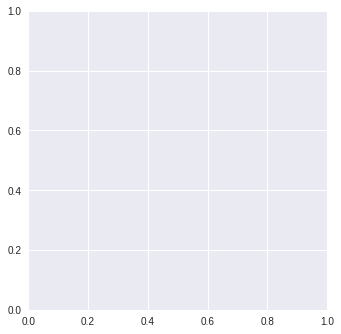

In [0]:
import matplotlib.pyplot as plt
plt.imshow(x_train[21])

In [0]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
from keras.layers import Input, Add
from sklearn.metrics import confusion_matrix

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x_train, y_train, test_size = 0.2)
train_ids = zip(x_train, y_train)
valid_ids = zip(x_test, y_test)

In [20]:
print x_train.shape, y_train.shape, x_test.shape, y_test.shape

(8646,) (8646,) (2162,) (2162,)


In [21]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
base_model = VGG16(weights='imagenet', include_top=False,input_shape = (224,224,3))
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [28]:
add_model = Sequential()
add_model.add(Flatten(input_shape=base_model.output_shape[1:]))
add_model.add(Dense(256, activation='relu'))
add_model.add(Dense(12, activation='softmax'))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 1, 1, 512)         12845568  
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 12)                6156      
Total params: 12,851,724
Trainable params: 12,851,724
Non-trainable params: 0
_________________________________________________________________


In [30]:
model_final = Model(inputs=base_model.input, outputs=add_model(base_model.output))

model_final.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
lrate = 0.0001
adam = Adam(lr=lrate, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
model_final.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])


In [0]:
for i, n in enumerate(model_final.layers):
  print i ,n
  

0 <keras.engine.topology.InputLayer object at 0x7f5c1f766cd0>
1 <keras.layers.convolutional.Conv2D object at 0x7f5c1c07e310>
2 <keras.layers.convolutional.Conv2D object at 0x7f5c1f766910>
3 <keras.layers.pooling.MaxPooling2D object at 0x7f5c1f766b90>
4 <keras.layers.convolutional.Conv2D object at 0x7f5c17190d10>
5 <keras.layers.convolutional.Conv2D object at 0x7f5c17190ad0>
6 <keras.layers.pooling.MaxPooling2D object at 0x7f5c171b2850>
7 <keras.layers.convolutional.Conv2D object at 0x7f5c1711bc90>
8 <keras.layers.convolutional.Conv2D object at 0x7f5c1711b610>
9 <keras.layers.convolutional.Conv2D object at 0x7f5c17154990>
10 <keras.layers.pooling.MaxPooling2D object at 0x7f5c17163f90>
11 <keras.layers.convolutional.Conv2D object at 0x7f5c170cddd0>
12 <keras.layers.convolutional.Conv2D object at 0x7f5c170cdb90>
13 <keras.layers.convolutional.Conv2D object at 0x7f5c170f4e90>
14 <keras.layers.pooling.MaxPooling2D object at 0x7f5c170a1fd0>
15 <keras.layers.convolutional.Conv2D object at 0x7

In [0]:
print model_final.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
#fit_generator
batch_size = 16
params = {'dim_x': 224,
          'dim_y': 224,
          'dim_z': 3,
          'batch_size': batch_size,
          'shuffle': True}

training_generator = DataGenerator(**params).generate(train_ids)
validation_generator = DataGenerator(**params).generate(valid_ids)


train_steps = len(train_ids)/batch_size
valid_steps = len(valid_ids)/batch_size



In [35]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

filepath = "drive/superheroes/model.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', save_best_only=True)
early_stopper = EarlyStopping(monitor='val_loss', patience=3)
callbacks_list = [early_stopper]

History = model_final.fit_generator(generator = training_generator,
                    steps_per_epoch = train_steps,
                    validation_data = validation_generator,
                    validation_steps = valid_steps,
                    epochs=20,
                    callbacks = callbacks_list)


Epoch 1/20


/usr/local/lib/python2.7/dist-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/usr/local/lib/python2.7/dist-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


  6/540 [..............................] - ETA: 4:48:54 - loss: 2.5881 - acc: 0.1458

KeyboardInterrupt: ignored

In [0]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
from numpy.testing import assert_allclose

filepath = "drive/superheroes/model.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', save_best_only=True)
early_stopper = EarlyStopping(monitor='val_loss', patience=5)
callbacks_list = [early_stopper]

# Fit the model
History = model_final.fit(x_train, y_train, epochs=20, validation_data=(x_test,y_test),  batch_size=16, callbacks=callbacks_list)

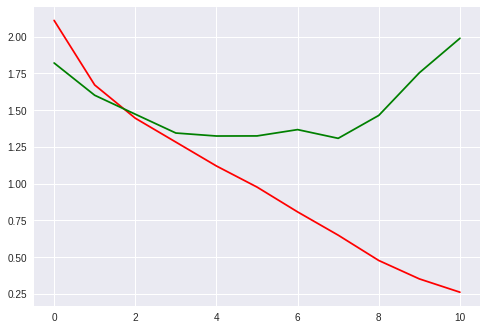

In [0]:
plt.plot(History.history['loss'], 'r')
plt.plot(History.history['val_loss'], 'g')

In [0]:
y_prob = model_final.predict_generator(validation_generator, steps=valid_steps+1)
target_class = np.argmax(y_prob, axis=1)

In [0]:
y_prob.shape

(2702,)

In [0]:
labels = ['Irnman',
'Suprmn',
'Aqamn',
'Hulk',
'AntMn',
'Catwmn',
'Avngs',
'Btmn',
'BlckPner',
'CapAme',
'Spdrmn',
'GhstRdr']

In [0]:
cm = confusion_matrix(y_test, target_class)
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
fig.colorbar(cax)

plt.xticks(range(len(labels)), labels)
plt.yticks(range(len(labels)), labels)

plt.show()

ValueError: ignored

In [0]:
class DataGenerator(object):
  'Generates data for Keras'
  def __init__(self, dim_x = 224, dim_y = 224, dim_z = 3, batch_size = 16, shuffle = True):
      'Initialization'
      self.dim_x = dim_x
      self.dim_y = dim_y
      self.dim_z = dim_z
      self.batch_size = batch_size
      self.shuffle = shuffle

  def generate(self, list_IDs):
      'Generates batches of samples'
      # Infinite loop
      while 1:
          # Generate order of exploration of dataset
          indexes = self.__get_exploration_order(list_IDs)

          # Generate batches
          imax = int(len(indexes)/self.batch_size)
          for i in range(imax):
              # Find list of IDs
              list_IDs_temp = [list_IDs[k] for k in indexes[i*self.batch_size:(i+1)*self.batch_size]]

              # Generate data
              X, y = self.__data_generation(list_IDs_temp)

              yield X, y

  def __get_exploration_order(self, list_IDs):
      'Generates order of exploration'
      # Find exploration order
      indexes = np.arange(len(list_IDs))
      if self.shuffle == True:
          np.random.shuffle(indexes)

      return indexes

  def __data_generation(self, list_IDs_temp):
      'Generates data of batch_size samples' # X : (n_samples, v_size, v_size, v_size, n_channels)
      # Initialization
      X = np.empty((self.batch_size, self.dim_x, self.dim_y, self.dim_z), dtype = np.float32)
      y = np.empty((self.batch_size), dtype = int)

      # Generate data
      for i, ID in enumerate(list_IDs_temp):
          # Store volume
          img = imread(ID[0])

          try:
            img = imresize(img,(224,224))
            img = img.astype(np.float32)
            img /= 255.
          except:
            print 'mode error: %s' %ID[0]
          
          
          
          assert ((img.shape[0] == self.dim_x) and (img.shape[1] == self.dim_y) and (img.shape[2] == self.dim_z)), "%d %d %d %s" %(img.shape[0], img.shape[1], img.shape[2], ID[0])
                               
          X[i, :, :, :] = img

          # Store class
          y[i] = ID[1]

      return X, sparsify(y)

def sparsify(y):
  'Returns labels in binary NumPy array'
  n_classes = 12 # Enter number of classes
  return np.array([[1 if y[i] == j else 0 for j in range(n_classes)]
                   for i in range(y.shape[0])])

In [0]:
# load the model
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from numpy.testing import assert_allclose


new_model = load_model("model.h5")
assert_allclose(model.predict(X_train),
                new_model.predict(X_train),
                1e-5)

# fit the model
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]
new_model.fit(X_train, Y_train, validation_data = (X_test,Y_test), epochs=5, batch_size=50, callbacks=callbacks_list)

Using TensorFlow backend.


IOError: ignored

>